<a href="https://colab.research.google.com/github/rwiddhi-b/image-classification-using-SVM/blob/main/MinorProject_Image_classification(_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install bing-image-downloader

In [5]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [6]:
# Gathering data for datasets

In [ ]:
from bing_image_downloader import downloader
downloader.download("Spanish Guitar",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
downloader.download("Books",limit=30,output_dir='images',adult_filter_off=True)

In [9]:
# Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
datadir = '/content/images'
categories=['Spanish Guitar','Books']

for i in categories:
  class_num = categories.index(i)   #label_encoding
  path=os.path.join(datadir,i)    #create path to access
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    #plt.imshow(img_arr)
    #break
    img_resize = resize(img_arr,(150,150,3))    # Normalizes the values from 0 to 1
    flat_data.append(img_resize.flatten())     # Resized image flattened & stored in array
    images.append(img_resize)
    target.append(class_num)
flat_data=np.array(flat_data)
target = np.array(target)
images = np.array(images) 

In [ ]:
len(flat_data[0])   # 150*150*3

67500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
np.unique(target,return_counts=True)

(array([0, 1]), array([30, 30]))

<BarContainer object of 2 artists>

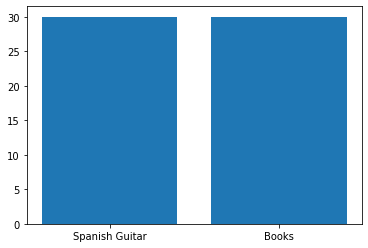

In [11]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=0,stratify=target)

In [13]:
# Applying SVM algorithm
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param = [
         {'C':[1,10,100,1000],'kernel':['linear']},
         {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
grid = GridSearchCV(svc,param)
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
y_pred = grid.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [15]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [16]:
#Evaluate the model using Confusion Matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8888888888888888

In [17]:
confusion_matrix(y_pred,y_test)

array([[7, 0],
       [2, 9]])

In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.82      0.90        11

    accuracy                           0.89        18
   macro avg       0.89      0.91      0.89        18
weighted avg       0.91      0.89      0.89        18



In [19]:
# Save the model using pickel library
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [20]:
model = pickle.load(open('img_model.p','rb'))

Enter URLhttps://www.incimages.com/uploaded_files/image/1920x1080/getty_655998316_2000149920009280219_363765.jpg
(1080, 1920, 3)
 predicted output: Books 


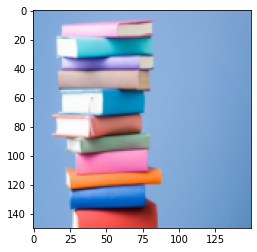

In [24]:
# Predicting for any new Image
flat_data=[]
url = input('Enter URL')
img = imread(url)
img_resize=resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f' predicted output: {y_out} ')

In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [ ]:
# Deployment using Streamlit
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image classifier using ML')
st.text('Upload Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...",type="jpg")
if uploaded_file is not None:
  img = Image.open('uploaded_file')
  st.image(img,caption='Uploaded Image')

  if st.button('Predict'):
    categories=['Spanish Guitar','Books']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resize=resize(img,(150,150,3))
    flat_data.append(img_resize.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = categories[y_out[0]]
    st.title(f' predicted output: {y_out} ')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(categories):
      st.write(f'{item}:{q[0][index]*100}%')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port='8050')
url

'http://4ba167c69e58.ngrok.io'